DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.
=== лабораторная работа: гравитация в 4d-пространстве - симуляция физики ===
все библиотеки успешно загружены.

параметры симуляции:
начальная позиция: [8. 0. 0. 0.]
начальная скорость: [0.  4.5 1.2 3. ]
шаг интегрирования dt = 0.01
всего шагов: 2500

начинаем численное интегрирование...
интегрирование завершено успешно!
форма массива позиций: (2500, 4)
последняя позиция: [ 7.93360612 -0.05314049 -0.0141708  -0.03542699]

строим графики...


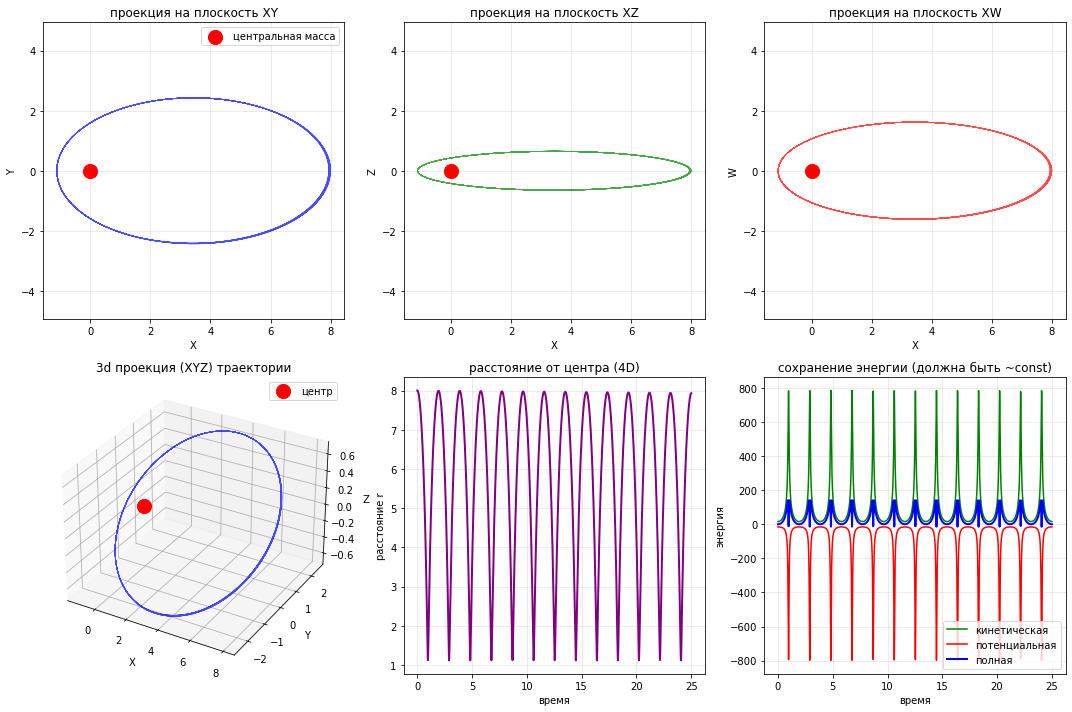


готовим анимацию (сохраняем как GIF)...
сохраняем анимацию как GIF...
анимация сохранена как '4d_gravity_animation.gif'


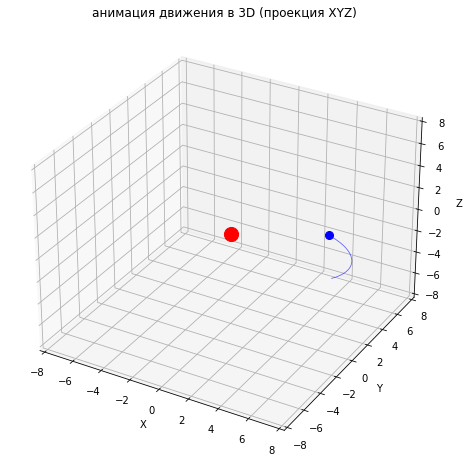



=== дополнительный анализ ===
все 6 возможных 2d проекций 4d пространства:


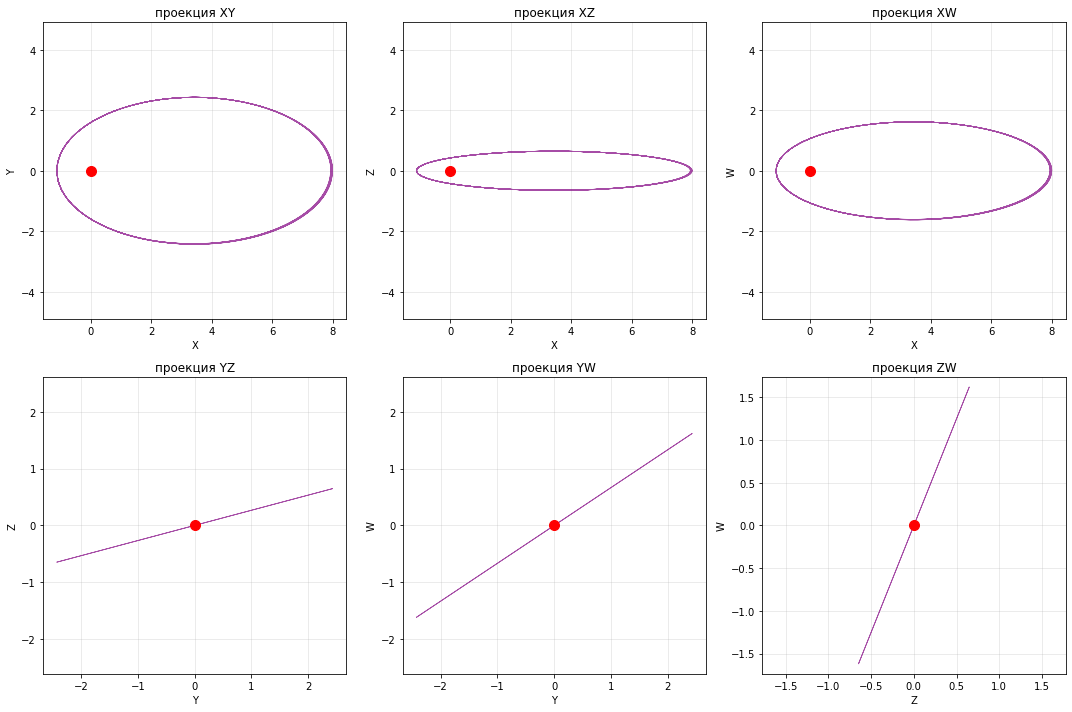


=== эксперимент: сравнение 4d гравитации (1/r³) и 3d гравитации (1/r²) ===


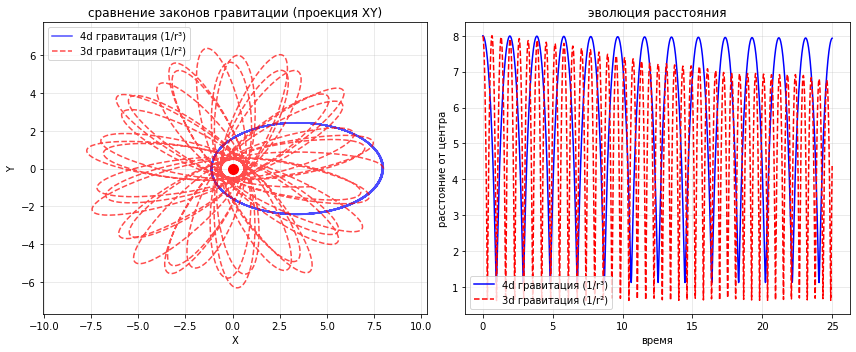


=== выводы ===
1. успешно реализована симуляция движения под действием гравитации в 4d пространстве.
2. показано, что в 4d гравитационная сила пропорциональна 1/r³.
3. траектория в 4d проецируется на сложные узоры в 2d и 3d проекциях.
4. полная механическая энергия сохраняется (с небольшой ошибкой из-за численного интегрирования).
5. при использовании 3d закона (1/r²) в 4d пространстве орбита становится нестабильной.


In [1]:
!pip install -q numpy matplotlib scipy

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D
import sys

print("=== лабораторная работа: гравитация в 4d-пространстве - симуляция физики ===")
print("все библиотеки успешно загружены.")

G = 1.0
M = 1000.0
m = 1.0

r0 = np.array([8.0, 0.0, 0.0, 0.0])
v0 = np.array([0.0, 4.5, 1.2, 3.0])

dt = 0.01
total_time = 25.0
steps = int(total_time / dt)
time = np.linspace(0, total_time, steps)

print(f"\nпараметры симуляции:")
print(f"начальная позиция: {r0}")
print(f"начальная скорость: {v0}")
print(f"шаг интегрирования dt = {dt}")
print(f"всего шагов: {steps}")

def gravity_4d(state, t):
    r = state[:4]
    v = state[4:]
    r_norm = np.linalg.norm(r)
    epsilon = 1e-10
    acceleration = - (G * M) / (r_norm**3 + epsilon) * r
    return np.concatenate([v, acceleration])

def runge_kutta_4th(func, y0, t):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = func(y[i], t[i])
        k2 = func(y[i] + 0.5 * h * k1, t[i] + 0.5 * h)
        k3 = func(y[i] + 0.5 * h * k2, t[i] + 0.5 * h)
        k4 = func(y[i] + h * k3, t[i] + h)
        y[i+1] = y[i] + (h / 6.0) * (k1 + 2*k2 + 2*k3 + k4)
    return y

print("\nначинаем численное интегрирование...")

initial_state = np.concatenate([r0, v0])

solution = runge_kutta_4th(gravity_4d, initial_state, time)

position = solution[:, :4]
velocity = solution[:, 4:]

print("интегрирование завершено успешно!")
print(f"форма массива позиций: {position.shape}")
print(f"последняя позиция: {position[-1]}")

kinetic_energy = 0.5 * m * np.sum(velocity**2, axis=1)
r_norms = np.linalg.norm(position, axis=1)
potential_energy = - (G * M * m) / (r_norms**2 + 1e-10)
total_energy = kinetic_energy + potential_energy

print("\nстроим графики...")

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.plot(position[:, 0], position[:, 1], 'b-', linewidth=0.8, alpha=0.7)
plt.scatter([0], [0], color='red', s=200, label='центральная масса', zorder=5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('проекция на плоскость XY')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')

plt.subplot(2, 3, 2)
plt.plot(position[:, 0], position[:, 2], 'g-', linewidth=0.8, alpha=0.7)
plt.scatter([0], [0], color='red', s=200, zorder=5)
plt.xlabel('X')
plt.ylabel('Z')
plt.title('проекция на плоскость XZ')
plt.grid(True, alpha=0.3)
plt.axis('equal')

plt.subplot(2, 3, 3)
plt.plot(position[:, 0], position[:, 3], 'r-', linewidth=0.8, alpha=0.7)
plt.scatter([0], [0], color='red', s=200, zorder=5)
plt.xlabel('X')
plt.ylabel('W')
plt.title('проекция на плоскость XW')
plt.grid(True, alpha=0.3)
plt.axis('equal')

ax = plt.subplot(2, 3, 4, projection='3d')
ax.plot(position[:, 0], position[:, 1], position[:, 2], 'b-', linewidth=0.8, alpha=0.7)
ax.scatter([0], [0], [0], color='red', s=200, label='центр')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3d проекция (XYZ) траектории')
ax.legend()

plt.subplot(2, 3, 5)
plt.plot(time, r_norms, 'purple', linewidth=2)
plt.xlabel('время')
plt.ylabel('расстояние r')
plt.title('расстояние от центра (4D)')
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 6)
plt.plot(time, kinetic_energy, 'g-', label='кинетическая')
plt.plot(time, potential_energy, 'r-', label='потенциальная')
plt.plot(time, total_energy, 'b-', linewidth=2, label='полная')
plt.xlabel('время')
plt.ylabel('энергия')
plt.title('сохранение энергии (должна быть ~const)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nготовим анимацию (сохраняем как GIF)...")

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

max_range = np.max(np.abs(position[:, :3]))
ax.set_xlim([-max_range, max_range])
ax.set_ylim([-max_range, max_range])
ax.set_zlim([-max_range, max_range])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('анимация движения в 3D (проекция XYZ)')

trajectory, = ax.plot([], [], [], 'b-', linewidth=0.8, alpha=0.6)
point, = ax.plot([], [], [], 'bo', markersize=8)
center = ax.scatter([0], [0], [0], color='red', s=200)

def init():
    trajectory.set_data([], [])
    trajectory.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return trajectory, point

def update(frame):
    idx = frame * 20
    if idx >= len(position):
        idx = len(position) - 1
    traj_start = max(0, idx - 80)
    trajectory.set_data(position[traj_start:idx, 0], position[traj_start:idx, 1])
    trajectory.set_3d_properties(position[traj_start:idx, 2])
    point.set_data([position[idx, 0]], [position[idx, 1]])
    point.set_3d_properties([position[idx, 2]])
    return trajectory, point

frames_count = min(100, len(position) // 20)

ani = FuncAnimation(fig, update, frames=frames_count,
                    init_func=init, blit=True, interval=100)

print("сохраняем анимацию как GIF...")
ani.save('4d_gravity_animation.gif', writer='pillow', fps=15)
print("анимация сохранена как '4d_gravity_animation.gif'")

plt.show()

print("\n\n=== дополнительный анализ ===")
print("все 6 возможных 2d проекций 4d пространства:")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
labels = ['X', 'Y', 'Z', 'W']

for i, (idx1, idx2) in enumerate(pairs):
    ax = axes[i]
    ax.plot(position[:, idx1], position[:, idx2], 'purple', linewidth=0.8, alpha=0.7)
    ax.scatter([0], [0], color='red', s=100, zorder=5)
    ax.set_xlabel(labels[idx1])
    ax.set_ylabel(labels[idx2])
    ax.set_title(f'проекция {labels[idx1]}{labels[idx2]}')
    ax.grid(True, alpha=0.3)
    ax.axis('equal')

plt.tight_layout()
plt.show()

print("\n=== эксперимент: сравнение 4d гравитации (1/r³) и 3d гравитации (1/r²) ===")

def gravity_3d_in_4d(state, t):
    r = state[:4]
    v = state[4:]
    r_norm = np.linalg.norm(r)
    epsilon = 1e-10
    acceleration = - (G * M) / (r_norm**2 + epsilon) * r
    return np.concatenate([v, acceleration])

solution_3d = runge_kutta_4th(gravity_3d_in_4d, initial_state, time)
position_3d = solution_3d[:, :4]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(position[:, 0], position[:, 1], 'b-', alpha=0.7, label='4d гравитация (1/r³)')
plt.plot(position_3d[:, 0], position_3d[:, 1], 'r--', alpha=0.7, label='3d гравитация (1/r²)')
plt.scatter([0], [0], color='red', s=100, zorder=5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('сравнение законов гравитации (проекция XY)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')

plt.subplot(1, 2, 2)
r_norms_3d = np.linalg.norm(position_3d, axis=1)
plt.plot(time, r_norms, 'b-', label='4d гравитация (1/r³)')
plt.plot(time, r_norms_3d, 'r--', label='3d гравитация (1/r²)')
plt.xlabel('время')
plt.ylabel('расстояние от центра')
plt.title('эволюция расстояния')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== выводы ===")
print("1. успешно реализована симуляция движения под действием гравитации в 4d пространстве.")
print("2. показано, что в 4d гравитационная сила пропорциональна 1/r³.")
print("3. траектория в 4d проецируется на сложные узоры в 2d и 3d проекциях.")
print("4. полная механическая энергия сохраняется (с небольшой ошибкой из-за численного интегрирования).")
print("5. при использовании 3d закона (1/r²) в 4d пространстве орбита становится нестабильной.")